In [1]:
#pip install rdkit pandas numpy seaborn sklearn

In [2]:
# https://www.rdkit.org/
import rdkit
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
#from mordred import Calculator, descriptors

from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#---------------------- RDKit packages
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
#------------------- progress bar
from tqdm import tqdm
#------------------- hide warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo), mol))

# Morgan_fingerprint

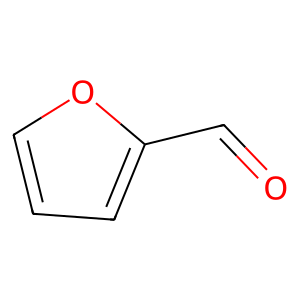

In [21]:
name1 = "c1cc(oc1)C=O"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1

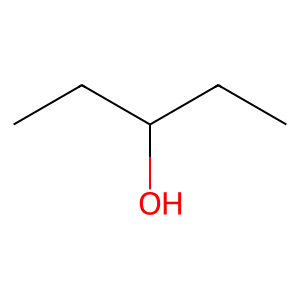

In [51]:
name2 = "CCC(CC)O"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2

In [52]:
data = {
  "SMILE": [name1, name2]
}
TEST_X = pd.DataFrame(data)
TEST_X["molecule"] = TEST_X["SMILE"].apply(lambda x: Chem.MolFromSmiles(x))
TEST_X["morgan_fp"] = TEST_X["molecule"].apply(lambda x: rdMolDescriptors.GetMorganFingerprintAsBitVect(x, radius=4, nBits=250, useFeatures=True, useChirality=True))
TEST_X

,SMILE,molecule,morgan_fp
0,CCCC(C)O,<rdkit.Chem.rdchem.Mol object at 0x000002B91E9...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CCC(CC)O,<rdkit.Chem.rdchem.Mol object at 0x000002B91E9...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [53]:
#rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True)

In [54]:
def SmileToMorganFP_df(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_array = np.array(morgan_fp)
    morgan_dataframe = pd.DataFrame(morgan_array)
    morgan_dataframe_row = morgan_dataframe.T
    return morgan_dataframe_row
def SmileToMorganFP(smiles):
    input_molecule = Chem.MolFromSmiles(smiles)
    morgan_fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(input_molecule, radius=4, nBits=250, useFeatures=True, useChirality=True)
    morgan_bit = morgan_fp.GetOnBits()
    morgan_array = np.array(morgan_fp)
    return morgan_array,tuple(morgan_bit)

In [55]:
# STEP 0 
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [56]:
# STEP 1
fp1 = SmileToMorganFP(name1)
fp2 = SmileToMorganFP(name2)

In [57]:
# STEP 2
# Find Diff Feature

fp_bit1=fp1[1]
fp_bit2=fp2[1]
all_diff = set(fp_bit1).symmetric_difference(set(fp_bit2))
diff2_from1 = set(fp_bit1)-set(fp_bit2)
diff1_from2 = set(fp_bit2)-set(fp_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [42, 47, 144, 193, 243]
M2 Diff from M1: 
 [47, 144, 243]
M1 Diff from M2: 
 [42, 193]


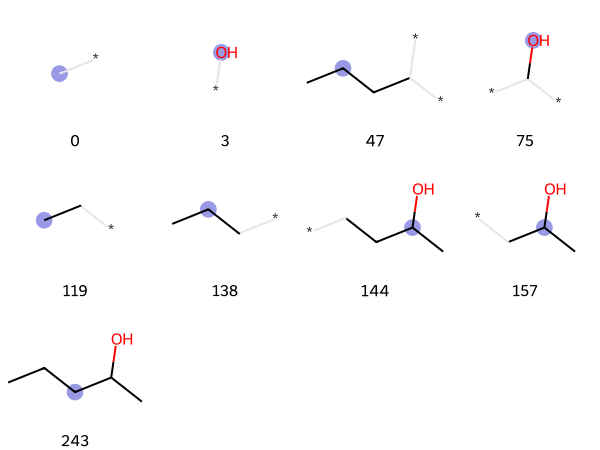

In [58]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m1, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

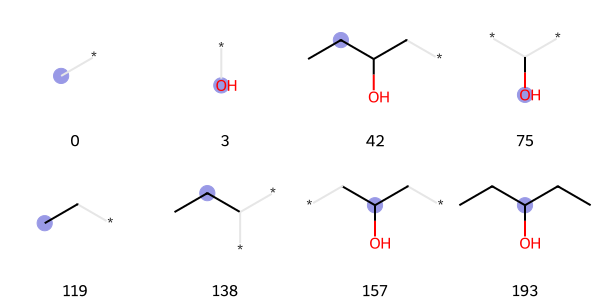

In [59]:
onbits = {}
mf = rdMolDescriptors.GetMorganFingerprintAsBitVect(m2, radius=4, nBits=250, useFeatures=True, useChirality=True, bitInfo=onbits)
all_fragments = [(m2, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])

In [60]:
'''
onbits = {}
all_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]
Draw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])
'''
#all_fragments

'\nonbits = {}\nall_fragments = [(m1, x, onbits) for x in mf.GetOnBits()]\nDraw.DrawMorganBits(all_fragments[:],molsPerRow=4, legends=[str(x) for x in mf.GetOnBits()][:])\n'

In [61]:
print(fp1[0])
print(fp2[0])

# print On bits
print("Index of On bits 1: \n",fp_bit1)
print("Index of On bits 2: \n",fp_bit2)
# how many bits are On?
print("Number of On bits 1: \n",len(fp_bit1))
print("Number of On bits 2: \n",len(fp_bit2))

print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

print("\n250 BITS")

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# MACCS

In [62]:
import requests
CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"
def smiles_to_iupac(smiles):
    rep = "iupac_name"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text

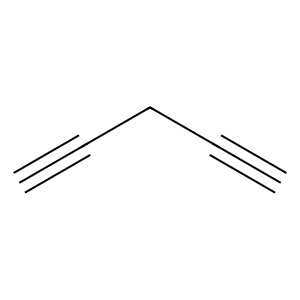

In [63]:
name1 = "C#CCC#C"
m1 = Chem.MolFromSmiles(name1)
img1 = Draw.MolToImage(m1)
img1
#img1.save('1-butyne.png')

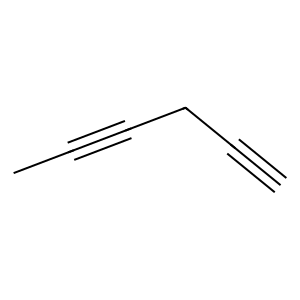

In [64]:
name2 = "C#CCC#CC"
m2 = Chem.MolFromSmiles(name2)
img2 = Draw.MolToImage(m2)
img2
#img2.save('2-butyne.png')

In [65]:
'''
name1 = "CCCCCCCCCO"
name2 = "CCCCCCCCCCO"
'''

'\nname1 = "CCCCCCCCCO"\nname2 = "CCCCCCCCCCO"\n'

In [66]:
# Generate MACCS (Molecular ACCess System) keys
from rdkit.Chem import MACCSkeys
Mkeys1 = MACCSkeys.GenMACCSKeys(m1)
Mkeys2 = MACCSkeys.GenMACCSKeys(m2)
# Use numpy array to see On and Off bits
arr_mkey1 = np.array(Mkeys1)
arr_mkey2 = np.array(Mkeys2)

#print(arr_mkey1)
#print(arr_mkey2)

arr_bit1 = tuple(Mkeys1.GetOnBits())
arr_bit2 = tuple(Mkeys2.GetOnBits())

# print On bits
print("Index of On bits 1:",tuple(Mkeys1.GetOnBits()))
print("Index of On bits 2:",tuple(Mkeys2.GetOnBits()))
# how many bits are On?
print("Number of On bits 1: ",len(Mkeys2.GetOnBits()))
print("Number of On bits 2: ",len(Mkeys2.GetOnBits()))


Index of On bits 1: (17, 155)
Index of On bits 2: (17, 116, 155, 160)
Number of On bits 1:  4
Number of On bits 2:  4


In [67]:
all_diff = set(arr_bit1).symmetric_difference(set(arr_bit2))
diff2_from1 = set(arr_bit1)-set(arr_bit2)
diff1_from2 = set(arr_bit2)-set(arr_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 [116, 160]
M2 Diff from M1: 
 []
M1 Diff from M2: 
 [116, 160]


In [68]:
print(arr_mkey1)
print(arr_mkey2)

# print On bits
print("Index of On bits 1: \n",tuple(Mkeys1.GetOnBits()))
print("Index of On bits 2: \n",tuple(Mkeys2.GetOnBits()))
# how many bits are On?
print("Number of On bits 1: \n",len(Mkeys2.GetOnBits()))
print("Number of On bits 2: \n",len(Mkeys2.GetOnBits()))

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
Index of On bits 1: 
 (17, 155)
Index of On bits 2: 
 (17, 116, 155, 160)
Number of On bits 1: 
 4
Number of On bits 2: 
 4
All Diff index: 
 [116, 160]
M2 Diff from M1: 
 []
M1 Diff from M2: 
 [116, 160]


In [69]:
#90:  ('[$([!#6;!#1;!H0]~*~*~[CH2]~*),$([!#6;!#1;!H0;R]1@[R]@[R]@[CH2;R]1),$([!#6;!#1;!H0]~[R]1@[R]@[CH2;R]1)]', 0),  # QHAACH2A
#115: ('[CH3]~*~[CH2]~*', 0),  # CH3ACH2A
#118: ('[$(*~[CH2]~[CH2]~*),$(*1~[CH2]~[CH2]1)]', 1),  # ACH2CH2A > 1
#147: ('[$(*~[CH2]~[CH2]~*),$([R]1@[CH2;R]@[CH2;R]1)]', 0),  # ACH2CH2A

# Increase Morgan_fp Bit

In [9]:
########   Prepare Data     ########
#Import Data
df = pd.read_excel("Data.xlsx",sheet_name="AllDataSet")

#Select feature for data
X_data= df[["SMILES"]]
#Y_data= df["Tb"]


In [10]:
X_data_use = X_data.copy()
MF_bit = 2**12
X_data_use["molecule"] = X_data_use["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
X_data_use["morgan_fp"] = X_data_use["molecule"].apply(lambda x: rdMolDescriptors.
                                                       GetMorganFingerprintAsBitVect(
                                                           x, radius=2, nBits=MF_bit, 
                                                           useFeatures=True, useChirality=True
                                                       ))

#>>> SHOW X_data_use 

#Transfrom Fingerprint to Column in DataFrame
X_data_fp = []
for i in range(X_data_use.shape[0]):
    array = np.array(X_data_use["morgan_fp"][i])
    datafram_i = pd.DataFrame(array)
    datafram_i = datafram_i.T
    X_data_fp.append(datafram_i)
X_data_fp = pd.concat(X_data_fp, ignore_index=True)
X_data_ML = pd.concat([X_data_use, X_data_fp], axis=1, join='inner')

In [11]:
#get Morgan_fp of all substance ex 560 datapoint
X_data= df["SMILES"]
mols = []
#SMILES=np.array(X_data["SMILES"])
SMILES=np.array(X_data)
for SMILE in SMILES:
    mol = Chem.MolFromSmiles(SMILE)
    mols.append(mol)

# we get 560 fp in FP_all
# FP_all = [fp_1, fp_2, ... , fp_560]
# Loop 

# see CURRENTLY_USE in 256, 512, ..., 2048 bit
# np.logical_or(FP_all).sum()
# >>> 156 bit use in 256 bit

## Check Large Bit

In [12]:
#get Morgan_fp of all substance ex 560 datapoint
X_data= df["SMILES"]
mols = []
#SMILES=np.array(X_data["SMILES"])
SMILES=np.array(X_data)
for SMILE in SMILES:
    mol = Chem.MolFromSmiles(SMILE)
    mols.append(mol)

# we get 560 fp in FP_all
# FP_all = [fp_1, fp_2, ... , fp_560]
# Loop 

# see CURRENTLY_USE in 256, 512, ..., 2048 bit
# np.logical_or(FP_all).sum()
# >>> 156 bit use in 256 bit

In [13]:
# Looping
bits = [2**10, 2**11, 2**12, 2**13, 2**14]
#bits = [2**1, 2**2, 2**3, 2**4, 2**5, 2**6]
#mols = [m1, m2, ..., m560]
#mols = [m1, m2]

#32768    1 min
#65536    1 min
#131072   5 min
unique=[]
for bit in bits:
    FPs = []
    infos = []
    for mol in mols:
        info = {}
        FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=bit, bitInfo=info, useFeatures=True))
        infos.append(info)
    unique.append(np.logical_or.reduce(FPs).sum())

In [14]:
unique

[754, 1005, 1167, 1276, 1339]

In [15]:
bits

[1024, 2048, 4096, 8192, 16384]

Text(0, 0.5, 'Bit On')

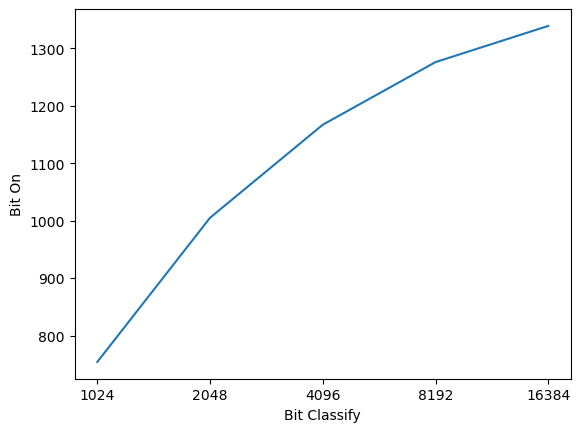

In [27]:
fig1=plt.plot(unique)
xticks = plt.xticks(range(len(bits)),bits)
#fig1.yaxis.get_major_locator().set_params(integer=True)
#fig1.ylabel("Bit On")
plt.xlabel("Bit Classify")
plt.ylabel("Bit On")

In [50]:
X_data

0                      CCOCCOCCOCCO
1       C(C(CO)(CO)COCC(CO)(CO)CO)O
2                C(C(C(C(CO)O)O)O)O
3                 C(C(COCC(CO)O)O)O
4          C1C=C2C(=CC(=O)O2)C(O1)O
                   ...             
1648          COC1=C(C=CC(=C1)CCO)O
1649              C1=CC(=CC=C1CO)CO
1650            C1=CC(=CC(=C1)CO)CO
1651                    C1CC(OC1)CO
1652                          COCOC
Name: SMILES, Length: 1653, dtype: object

## Get Smart Large Bit

In [23]:
Mol_df = pd.DataFrame(mols)
test = Mol_df.apply(lambda x: get_All_SMART_1_mol(x, MF_bit))
test

ArgumentError: Python argument types in
    rdkit.Chem.rdMolDescriptors.GetHashedMorganFingerprint(Series, int)
did not match C++ signature:
    GetHashedMorganFingerprint(class RDKit::ROMol mol, unsigned int radius, unsigned int nBits=2048, class boost::python::api::object invariants=[], class boost::python::api::object fromAtoms=[], bool useChirality=False, bool useBondTypes=True, bool useFeatures=False, class boost::python::api::object bitInfo=None, bool includeRedundantEnvironments=False)

## Check Small Bit

In [7]:
def MF_FP_to_df_X_bit(X_data_use):
    X_data_use = pd.DataFrame(np.array(X_data_use))
    #print("\n -----------------")
    #print(X_data_use)
    #X_data_ML = pd.concat([X_data_use, X_data_fp], axis=1, join='inner')
    return X_data_use

In [8]:
#get Morgan_fp of all substance ex 560 datapoint
X_data= df["SMILES"][:3]
mols = []
#SMILES=np.array(X_data["SMILES"])
SMILES=np.array(X_data)
for SMILE in SMILES:
    mol = Chem.MolFromSmiles(SMILE)
    mols.append(mol)

# we get 560 fp in FP_all
# FP_all = [fp_1, fp_2, ... , fp_560]
# Loop 

# see CURRENTLY_USE in 256, 512, ..., 2048 bit
# np.logical_or(FP_all).sum()
# >>> 156 bit use in 256 bit

In [9]:
bit = 2**6
FPs = []
infos = []
for mol in mols:
    info = {}
    FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=bit, bitInfo=info, useFeatures=True))
np.logical_or.reduce(FPs).sum()

28

In [10]:
MF_FP_to_df_X_bit(FPs)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,1,0,1,1,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
# Looping
bits = [2**5, 2**6, 2**7, 2**8, 2**9, 2**10, 2**11, 2**12, 2**13]

#32768    1 min
#65536    1 min
#131072   5 min
unique=[]
for bit in bits:
    FPs = []
    infos = []
    for mol in mols:
        info = {}
        FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=bit, bitInfo=info, useFeatures=True))
        infos.append(info)
    unique.append(np.logical_or.reduce(FPs).sum())

In [12]:
unique

[24, 28, 31, 31, 31, 31, 31, 31, 31]

In [13]:
bits

[32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

In [14]:
np.array(unique)/np.array(bits)

array([0.75      , 0.4375    , 0.2421875 , 0.12109375, 0.06054688,
       0.03027344, 0.01513672, 0.00756836, 0.00378418])

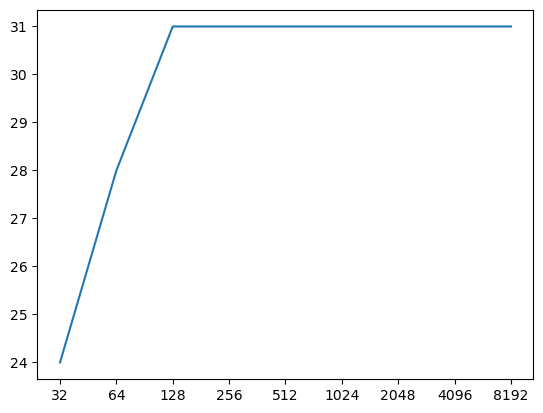

In [15]:
fig1,ax1 =plt.subplots()
ax1.plot(unique)
xticks = plt.xticks(range(len(bits)),bits)
ax1.yaxis.get_major_locator().set_params(integer=True)

In [ ]:
#fig1.savefig("Picture/3mol_checkColiision.png")

In [22]:
# RDKit
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint

from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
#
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed,IntSlider

def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result
def getSMART(mol_in, radius, atomidx, nBits):
    mol = mol_in
    env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atomidx)
    atomsToUse = set((atomidx, ))
    for b in env:
        atomsToUse.add(mol.GetBondWithIdx(b).GetBeginAtomIdx())
        atomsToUse.add(mol.GetBondWithIdx(b).GetEndAtomIdx())
    enlargedEnv = set()
    for atom in atomsToUse:
        a = mol.GetAtomWithIdx(atom)
        for b in a.GetBonds():
            bidx = b.GetIdx()
            if bidx not in env:
                enlargedEnv.add(bidx)
    enlargedEnv = list(enlargedEnv)
    enlargedEnv += env
    # find all relevant neighbors
    anyAtoms = []
    for a in atomsToUse:
        neighbors = mol.GetAtomWithIdx(a).GetNeighbors()
        for n in neighbors:
            anyIdx = n.GetIdx()
            if anyIdx not in atomsToUse:
                anyAtoms.append(anyIdx)
    # replace atomic number to zero (there is no number for any atom)
    for aA in anyAtoms:
        mol.GetAtomWithIdx(aA).SetAtomicNum(0)
    submol = Chem.PathToSubmol(mol, enlargedEnv)
    # change [0] to *
    MorganBitSmarts = Chem.MolToSmarts(submol).replace('[#0]', '*')
    #print(MorganBitSmarts)
    return MorganBitSmarts 
def get_All_SMART_1_mol(mol_in, nBits):
    bit_info = {}
    mol = mol_in
    fp = GetHashedMorganFingerprint(mol, 3, nBits=nBits, bitInfo=bit_info, useFeatures=True)

    #print(get_index_of_array_that_contain_1_in_any_position(list(fp)))
    #print(bit_info.keys())
    string_SMARTS = []
    #print("PASS")
    for i,v in enumerate(bit_info.keys()):
        #print(i)
        #print("v=",v)
        atomidx, radius = bit_info[v][0]
        #print("atomidx= ",atomidx)
        #print("radius= ",radius)
        string_SMART = getSMART(mol, radius=radius, atomidx=atomidx, nBits=nBits)
        #print(v, string_SMART)
        string_SMARTS.append((v,string_SMART))
    return string_SMARTS

## Get Smart Small Bit

In [ ]:
X_data= df[["SMILES"]][:3]
X_data["molecule"] = X_data["SMILES"].apply(lambda x: Chem.MolFromSmiles(x))
mols = []
X_data

In [ ]:
#SMILES=np.array(X_data["SMILES"])
x_data = X_data["SMILES"]
SMILES=np.array(x_data)
for SMILE in SMILES:
    mol = Chem.MolFromSmiles(SMILE)
    mols.append(mol)

In [ ]:
mols[1]

In [ ]:
nBits = 128
test = X_data["molecule"].apply(lambda x: get_All_SMART_1_mol(x, nBits))
test

In [ ]:
# %%
count = set()
for i in test:
    #print(i)
    for idx, val in i:
        count.add(idx)
count = sorted(count)
# %%
len(count)
# %%
# get smart of all bit molecule
check_bit = dict()
for i in count:
     check_bit[str(i)]=set()
    
for v in test:    
    for i in count:
        #check_bit[str(i)]=set()
        #print(i,"COUNT")
        for bit in v:
            #print(bit[0])
            if i == bit[0]:
              #print("PASS")
              check_bit[str(i)].add(bit[1])
check_bit

In [ ]:

# %%
data =[]
idx_all=[]
count_str=[]
for idx in check_bit:
    #print(idx, len(check_bit[str(idx)]))
    
    idx_all.append(idx)
    count_str.append(len(check_bit[str(idx)]))
    
data = {
        "no. Bit":idx_all,
        "Number Structure":count_str
    }    
#pd.DataFrame(data).to_csv("Bit collision/Check_SMART_in_bit_3mol.csv")

In [ ]:
from collections import OrderedDict
a=list(check_bit['24'])
#print(len(a))


sort_check_bit1 = OrderedDict(sorted(check_bit.items(), key = lambda x : len(x[1]), reverse=True)).keys()
sort_check_bit2 = {i:check_bit[i] for i in sort_check_bit1}

# %%
#for idx in sort_check_bit2.keys():
temp=[80]
for idx in temp:
    #subms = [x for x in list(check_bit[idx])]
    subms = [x for x in list(check_bit[str(idx)])]
    #print(idx)
    
    mol_subms = []
    for smart in subms:
        mol=Chem.MolFromSmarts(smart)
        mol_subms.append(mol)
        
    #a=Chem.MolFromSmarts(list(check_bit['20'])[5])
    #a2=Chem.MolToSmarts(a)
    #img = Draw.MolToImage(a)
    img=Draw.MolsToGridImage(mol_subms,molsPerRow=5,subImgSize=(200,200)) 
    #picname = "Picture/"+idx+".png"
    #img.save(picname,format="PNG")
   #img.save(picname)
img

# Atom-pair Fingerprint
https://www.youtube.com/watch?v=-oHqQBUyrQ0&t=407s

In [31]:
ms = [Chem.MolFromSmiles('C1CCC1OCC'),Chem.MolFromSmiles('CC(C)OCC'),Chem.MolFromSmiles('CCOCC')]

In [32]:
fpgen = [rdMolDescriptors.GetHashedAtomPairFingerprintAsBitVect(x, nBits=512) for x in ms]
#pairFps = [fpgen.GetSparseCountFingerprint(x) for x in ms]

In [33]:
[x.GetNumOnBits() for x in fpgen]

[20, 14, 10]

In [34]:
# STEP 2
# Find Diff Feature

fp_bit1=fpgen[1]
fp_bit2=fpgen[2]
all_diff = set(fp_bit1).symmetric_difference(set(fp_bit2))
diff2_from1 = set(fp_bit1)-set(fp_bit2)
diff1_from2 = set(fp_bit2)-set(fp_bit1)

#print("M1 is ", smiles_to_iupac(name1)   )
#print("M2 is ",  smiles_to_iupac(name2)  )
print("All Diff index: \n", sorted(all_diff))
print("M2 Diff from M1: \n", sorted(diff2_from1))
print("M1 Diff from M2: \n", sorted(diff1_from2))

All Diff index: 
 []
M2 Diff from M1: 
 []
M1 Diff from M2: 
 []


# Morgan_fingerprint Count-based